In this challenge, you'll practice the statistical techniques you learned in the previous missions. These techniques are referred to collectively as **descriptive statistics** since they're used to describe and understand a dataset and not directly for prediction.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
movie_reviews = pd.read_csv("fandango_score_comparison.csv")

In [3]:
movie_reviews.head()

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Fandango_Stars,Fandango_Ratingvalue,RT_norm,RT_user_norm,...,IMDB_norm,RT_norm_round,RT_user_norm_round,Metacritic_norm_round,Metacritic_user_norm_round,IMDB_norm_round,Metacritic_user_vote_count,IMDB_user_vote_count,Fandango_votes,Fandango_Difference
0,Avengers: Age of Ultron (2015),74,86,66,7.1,7.8,5.0,4.5,3.70,4.3,...,3.90,3.5,4.5,3.5,3.5,4.0,1330,271107,14846,0.5
1,Cinderella (2015),85,80,67,7.5,7.1,5.0,4.5,4.25,4.0,...,3.55,4.5,4.0,3.5,4.0,3.5,249,65709,12640,0.5
2,Ant-Man (2015),80,90,64,8.1,7.8,5.0,4.5,4.00,4.5,...,3.90,4.0,4.5,3.0,4.0,4.0,627,103660,12055,0.5
3,Do You Believe? (2015),18,84,22,4.7,5.4,5.0,4.5,0.90,4.2,...,2.70,1.0,4.0,1.0,2.5,2.5,31,3136,1793,0.5
4,Hot Tub Time Machine 2 (2015),14,28,29,3.4,5.1,3.5,3.0,0.70,1.4,...,2.55,0.5,1.5,1.5,1.5,2.5,88,19560,1021,0.5


In [4]:
movie_reviews.columns

Index(['FILM', 'RottenTomatoes', 'RottenTomatoes_User', 'Metacritic',
       'Metacritic_User', 'IMDB', 'Fandango_Stars', 'Fandango_Ratingvalue',
       'RT_norm', 'RT_user_norm', 'Metacritic_norm', 'Metacritic_user_nom',
       'IMDB_norm', 'RT_norm_round', 'RT_user_norm_round',
       'Metacritic_norm_round', 'Metacritic_user_norm_round',
       'IMDB_norm_round', 'Metacritic_user_vote_count', 'IMDB_user_vote_count',
       'Fandango_votes', 'Fandango_Difference'],
      dtype='object')

Here are some of the columns in the dataset:

* FILM - film name.
* RottenTomatoes - Rotten Tomatoes critics average score.
* RottenTomatoes_User - Rotten Tomatoes user average score.
* RT_norm - Rotten Tomatoes critics average score (normalized to a 0 to 5 point scale).
* RT_user_norm - Rotten Tomatoes user average score (normalized to a 0 to 5 point scale).
* Metacritic - Metacritic critics average score.
* Metacritic_user_nom - Metacritic user average score (normalized to a 0 to 5 point scale).
* Metacritic_norm - Metacritic critics average score (normalized to a 0 to 5 point scale).
* Fandango_Ratingvalue - Fandango user average score (0 to 5 stars).
* IMDB_norm - IMDB user average score (normalized to a 0 to 5 point scale).

In [5]:
movie_reviews[["RT_user_norm","Metacritic_user_nom","Fandango_Ratingvalue","IMDB_norm"]].describe()

,RT_user_norm,Metacritic_user_nom,Fandango_Ratingvalue,IMDB_norm
count,146.000000,146.000000,146.000000,146.000000
mean,3.193836,3.259589,3.845205,3.368493
std,1.001222,0.755356,0.502831,0.479368
min,1.000000,1.200000,2.700000,2.000000
25%,2.500000,2.850000,3.500000,3.150000
50%,3.325000,3.425000,3.900000,3.450000
75%,4.050000,3.750000,4.200000,3.700000
max,4.700000,4.800000,4.800000,4.300000


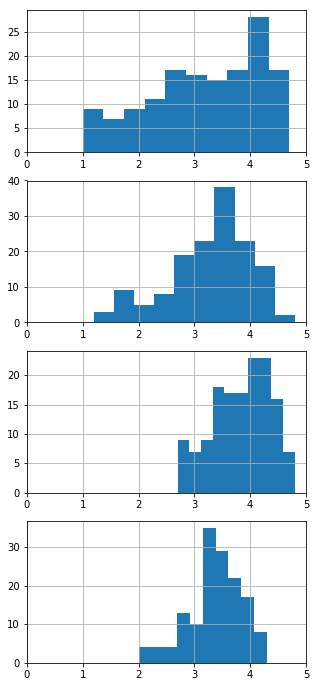

In [6]:
# Create a matplotlib subplot grid with the following properties:
# 4 rows by 1 column,
# figsize of 5 (width) by 12 (height).
# each Axes instance should have an x-value range of 0.0 to 5.0.
fig = plt.figure(figsize=(5, 12))

ax1 = fig.add_subplot(4,1,1)
ax2 = fig.add_subplot(4,1,2)
ax3 = fig.add_subplot(4,1,3)
ax4 = fig.add_subplot(4,1,4)

ax1.set_xlim(0.0,5.0)
ax2.set_xlim(0.0,5.0)
ax3.set_xlim(0.0,5.0)
ax4.set_xlim(0.0,5.0)

# Generate the following histograms:
# First plot (top most): Histogram of normalized Rotten Tomatoes scores by users.
# Second plot: Histogram of normalized Metacritic scores by users.
# Third plot: Histogram of Fandango scores by users.
# Fourth plot (bottom most): Histogram of IMDB scores by users.
movie_reviews["RT_user_norm"].hist(ax=ax1)
movie_reviews["Metacritic_user_nom"].hist(ax=ax2)
movie_reviews["Fandango_Ratingvalue"].hist(ax=ax3)
movie_reviews["IMDB_norm"].hist(ax=ax4)

plt.show()

The most obvious things that stick out is that essentially all of the Fandango average user reviews are greater than 3 on a 5 point scale. The distributions of the Rotten Tomatoes and Metacritic scores, on the other hand, more closely resemble a normal distribution, which is generally what you'd expect if you knew nothing else. This is because the normal distribution is the most common distribution in nature and is used to approximate many phenomenon. Starting with the assumption that a phenomenon is normal is incredibly common, especially when you don't have a clear generative model to understand how the data was generated.

Now that you hopefully have some visual understanding of these scores, let's calculate some statistical measures to see how the properties the histograms suggested are reflected in numerical values. Let's focus on just the normalized user reviews in this mission.

In [7]:
# Write a function, named calc_mean, that returns the mean for the values in a Series object.
def calc_mean(series):
    vals = series.values
    mean = sum(vals) / len(vals)
    return mean

# Select just the columns containing normalized user reviews and assign to a separate Dataframe named user_reviews.
# Those columns are: RT_user_norm, Metacritic_user_nom, Fandango_Ratingvalue, IMDB_norm.
user_reviews = movie_reviews[["RT_user_norm","Metacritic_user_nom","Fandango_Ratingvalue","IMDB_norm"]]

# Use the Dataframe method apply to apply the calc_mean function over the filtered Dataframe user_reviews.
# user_reviews_mean = user_reviews.apply(lambda series:series.mean())
user_reviews_mean = user_reviews.apply(calc_mean)
rt_mean = user_reviews_mean["RT_user_norm"]
mc_mean = user_reviews_mean["Metacritic_user_nom"]
fg_mean = user_reviews_mean["Fandango_Ratingvalue"]
id_mean = user_reviews_mean["IMDB_norm"]

print(user_reviews_mean)

print("Rotten Tomatoes (mean):", rt_mean)
print("Metacritic (mean):", mc_mean)
print("Fandango (mean):",fg_mean)
print("IMDB (mean):",id_mean)

RT_user_norm            3.193836
Metacritic_user_nom     3.259589
Fandango_Ratingvalue    3.845205
IMDB_norm               3.368493
dtype: float64
Rotten Tomatoes (mean): 3.19383561644
Metacritic (mean): 3.2595890411
Fandango (mean): 3.84520547945
IMDB (mean): 3.36849315068


It seems like the Fandango user reviews have the highest mean and skew the most towards to the higher end compared to the other review sites. Let's now calculate variance and standard deviation to better understand the spreads.

In [8]:
# To calculate the variance:
# write a function, named calc_variance, that returns the variance for the values in a Series object.
def calc_variance(series):
    mean = calc_mean(series)
    squared_deviations = (series - mean)**2
    mean_squared_deviations = calc_mean(squared_deviations)
    return mean_squared_deviations

# To calculate the standard deviation:
# use the output of the calc_variance function since standard deviation is a simple calculation away from variance.

# Calculate the variance and standard deviation for the RT_user_norm column
# and assign to rt_var and rt_stdev respectively.
rt_var = calc_variance(user_reviews["RT_user_norm"])
rt_stdev = rt_var**0.5
print("rt_var:", rt_var)
print("rt_stdev:", rt_stdev)

# Calculate the variance and standard deviation for the Metacritic_user_nom column
# and assign to mc_var and mc_stdev respectively.
mc_var = calc_variance(user_reviews["Metacritic_user_nom"])
mc_stdev = mc_var**0.5
print("mc_var:", mc_var)
print("mc_stdev:", mc_stdev)

# Calculate the variance and standard deviation for the Fandango_Ratingvalue column
# and assign to fg_var and fg_stdev respectively.
fg_var = calc_variance(user_reviews["Fandango_Ratingvalue"])
fg_stdev = fg_var**0.5
print("fg_var:", fg_var)
print("fg_stdev:", fg_stdev)

# Calculate the variance and standard deviation for the IMDB_norm column
# and assign to id_var and id_stdev respectively.
id_var = calc_variance(user_reviews["IMDB_norm"])
id_stdev = id_var**0.5
print("id_var:", id_var)
print("id_stdev:", id_stdev)

rt_var: 0.995578438731
rt_stdev: 0.997786770173
mc_var: 0.566654625633
mc_stdev: 0.752764654878
fg_var: 0.251107149559
fg_stdev: 0.501105926486
id_var: 0.228219647213
id_stdev: 0.47772340032


The mean and variance values you calculated in the last screens should match the visual intuition the histograms gave you.

Rotten Tomatoes and Metacritic have more spread out scores (high variance) and the mean is around 3.

Fandango, on the other hand, has low spread (low variance) and a much higher mean, which could imply that the site has a strong bias towards higher reviews.

IMDB is somewhere in the middle, with a low variance, like Fandango's user reviews, but a much more moderate mean value.

So it seems like something is especially fishy about Fandango's ratings, which was the inspiration behind [the FiveThirtyEight post](http://fivethirtyeight.com/features/fandango-movies-ratings/) to begin with. Since Fandango's main business is selling movie tickets, it's possible their primary incentive may differ from pure review sites like Rotten Tomatoes or Metacritic.

Let's now explore if Fandango's user ratings are at least relatively correct. More precisely, are movies that are highly rated on Rotten Tomatoes, IMDB, and Metacritic also highly rated on Fandango?

We can accomplish that by understanding how Fandango's scores and related to scores from Rotten Tomatoes and Metacritic. First things first, let's get a visual sense by generating scatter plots.

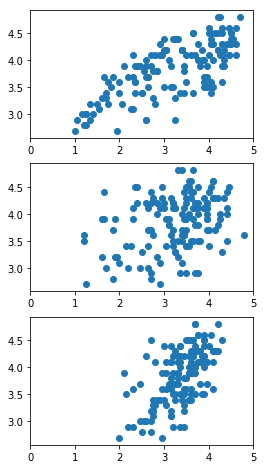

In [9]:
# Create a matplotlib subplot grid with the following properties:
# 3 rows by 1 column,
# figsize of 4 (width) by 8 (height),
# each Axes instance should have an x-value range of 0.0 to 5.0.
fig = plt.figure(figsize=(4, 8))

ax1 = fig.add_subplot(3,1,1)
ax2 = fig.add_subplot(3,1,2)
ax3 = fig.add_subplot(3,1,3)

ax1.set_xlim(0.0,5.0)
ax2.set_xlim(0.0,5.0)
ax3.set_xlim(0.0,5.0)

# Generate the following scatter plot (y-axis vs x-axis):
# First plot (top most): Fandango user reviews vs. Rotten Tomatoes user reviews.
# Second plot: Fandango user reviews vs. Metacritic user reviews.
# Third plot (bottom most): Fandango user reviews vs. IMDB user reviews.
ax1.scatter(user_reviews["RT_user_norm"], user_reviews["Fandango_Ratingvalue"])
ax2.scatter(user_reviews["Metacritic_user_nom"], user_reviews["Fandango_Ratingvalue"])
ax3.scatter(user_reviews["IMDB_norm"], user_reviews["Fandango_Ratingvalue"])

plt.show()

It seems like Rotten Tomatoes and IMDB user reviews correlate the most with Fandango user reviews while Metacritic only weakly correlates. Let's write a function that to calculates the covariance values in this screen and a function to calculate the correlation values in the next screen.

Here's the formula for computing the covariance between 2 variables:

$\large cov(\mathbf{x},\mathbf{y})=\frac{\sum_{i=1}^{n}(x_i-\bar{x})(y_i-\bar{y})}{n}$

In [10]:
# Write a function, named calc_covariance, that computes the covariance between the values of 2 Series objects.
def calc_covariance(series_one, series_two):
    x = series_one.values
    y = series_two.values
    x_mean = calc_mean(series_one)
    y_mean = calc_mean(series_two)
    x_diffs = [i - x_mean for i in x]
    y_diffs = [i - y_mean for i in y]
    codeviates = [x_diffs[i] * y_diffs[i] for i in range(len(x))]
    return sum(codeviates) / len(codeviates)

# Compute the covariance between the RT_user_norm and Fandango_Ratingvalue columns.
# Assign the result to rt_fg_covar.
rt_fg_covar = calc_covariance(user_reviews["RT_user_norm"], user_reviews["Fandango_Ratingvalue"])

# Compute the covariance between the Metacritic_user_nom and Fandango_Ratingvalue columns.
# Assign the result to mc_fg_covar.
mc_fg_covar = calc_covariance(user_reviews["Metacritic_user_nom"], user_reviews["Fandango_Ratingvalue"])

# Compute the covariance between the IMDB_norm and Fandango_Ratingvalue columns.
# Assign the result to id_fg_covar.
id_fg_covar = calc_covariance(user_reviews["IMDB_norm"], user_reviews["Fandango_Ratingvalue"])

# Use the variables display below the code output window or print statements to observe each value.
print("Covariance between Rotten Tomatoes and Fandango:", rt_fg_covar)
print("Covariance between Metacritic and Fandango", mc_fg_covar)
print("Covariance between IMDB and Fandango", id_fg_covar)

Covariance between Rotten Tomatoes and Fandango: 0.362162225558
Covariance between Metacritic and Fandango 0.127100769375
Covariance between IMDB and Fandango 0.143718802777


Interestingly, Rotten Tomatoes covaries strongly with Fandango (0.36) compared to Metacritic (0.13) and IMDB (0.14). Finally, let's calculate the correlation values by using the calc_covariance a function from the previous step.

Here's the full formula for correlation:

$\Large\frac{cov(\mathbf{x},\mathbf{y})}{\sigma_{x}\sigma_{y}}$

where **cov** is shorthand for the covariance function, and **σ** represents the standard deviation.

In [11]:
# Write a function, named calc_correlation,
# that uses the calc_covariance and calc_variance functions to calculate the correlation for 2 Series objects.
# The function should have 2 parameters, one for each Series object.
def calc_correlation(series_one, series_two):
    return calc_covariance(series_one, series_two)/(calc_variance(series_one)*calc_variance(series_two))**0.5

# Compute the correlation between the RT_user_norm and Fandango_Ratingvalue columns
# and assign the result to rt_fg_corr.
rt_fg_corr = calc_correlation(user_reviews["RT_user_norm"], user_reviews["Fandango_Ratingvalue"])

# Compute the correlation between the Metacritic_user_nom and Fandango_Ratingvalue columns
# and assign the result to mc_fg_corr.
mc_fg_corr = calc_correlation(user_reviews["Metacritic_user_nom"], user_reviews["Fandango_Ratingvalue"])

# Compute the correlation between the IMDB_norm and Fandango_Ratingvalue columns
# and assign the result to id_fg_corr.
id_fg_corr = calc_correlation(user_reviews["IMDB_norm"], user_reviews["Fandango_Ratingvalue"])

# Use the variables display below the code output window or print statements to observe each value.
print("Correlation between Rotten Tomatoes and Fandango", rt_fg_corr)
print("Correlation between Metacritic and Fandango", mc_fg_corr)
print("Correlation between IMDB and Fandango", id_fg_corr)

Correlation between Rotten Tomatoes and Fandango 0.724328994249
Correlation between Metacritic and Fandango 0.336945314265
Correlation between IMDB and Fandango 0.600354177263


In [12]:
from scipy.stats.stats import pearsonr

In [13]:
rt_fg_corr = pearsonr(user_reviews["RT_user_norm"], user_reviews["Fandango_Ratingvalue"])[0]
mc_fg_corr = pearsonr(user_reviews["Metacritic_user_nom"], user_reviews["Fandango_Ratingvalue"])[0]
id_fg_corr = pearsonr(user_reviews["IMDB_norm"], user_reviews["Fandango_Ratingvalue"])[0]

print("Correlation between Rotten Tomatoes and Fandango", rt_fg_corr)
print("Correlation between Metacritic and Fandango", mc_fg_corr)
print("Correlation between IMDB and Fandango", id_fg_corr)

Correlation between Rotten Tomatoes and Fandango 0.724328994249
Correlation between Metacritic and Fandango 0.336945314265
Correlation between IMDB and Fandango 0.600354177263


As the scatter plots suggested, Rotten Tomatoes and IMDB correlate the strongest with Fandango, with correlation values of 0.72 and 0.60 respectively.

Metacritic, on the other hand, only has a correlation value of 0.34 with Fandango.

While covariance and correlation values may seem complicated to compute and hard to reason with, their best use case is in comparing relationships like we did in this challenge.